<a href="https://colab.research.google.com/github/anoodleReza/Waste-Classification-using-CNN/blob/main/PR_Group_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import os, shutil, random, glob, cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Data Acquisition


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Setting Up collab folder
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle
#Setting kaggle credentials
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
#Importing dataset from kaggle
! kaggle datasets download -d techsash/waste-classification-data

100% 427M/427M [00:12<00:00, 44.2MB/s]
100% 427M/427M [00:12<00:00, 36.1MB/s]


In [ ]:
! unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [ ]:
trainOrganic = glob.glob('/content/DATASET/TRAIN/O/*.jpg')
trainRecycle = glob.glob('/content/DATASET/TRAIN/R/*.jpg')
testOrganic = glob.glob('/content/DATASET/TEST/O/*.jpg')
testRecycle = glob.glob('/content/DATASET/TEST/R/*.jpg')

In [ ]:
# obtaining the image quantities for each class
print('Organic Train Images : {}'.format(len(trainOrganic)))
print('Organic Test Images : {}'.format(len(testOrganic)))
print('Recyclable Train Images : {}'.format(len(trainRecycle)))
print('Recyclable Test Images : {}'.format(len(testRecycle)))

Organic Train Images : 12565
Organic Test Images : 1401
Recyclable Train Images : 9999
Recyclable Test Images : 1112


# Data Setup

In [ ]:
# Adding a target label as a new column
_trainOrganic = []
for x in trainOrganic:
  _trainOrganic.append([x,0])
_trainRecycle = []
for x in trainRecycle:
  _trainRecycle.append([x,1])

_testOrganic = []
for x in testOrganic:
  _testOrganic.append([x,0])
_testRecycle = []
for x in testRecycle:
  _testRecycle.append([x,1])

In [ ]:
# Combining the data
trainData = _trainOrganic + _trainRecycle
testData = _testOrganic + _testRecycle

# Shuffle the dataframes
random.seed(42)
random.shuffle(trainData)
random.shuffle(testData)

In [ ]:
df = pd.DataFrame(trainData, columns = ['files','target'])
df.head(10)

,files,target
0,/content/DATASET/TRAIN/R/R_6061.jpg,1
1,/content/DATASET/TRAIN/R/R_8178.jpg,1
2,/content/DATASET/TRAIN/R/R_3673.jpg,1
3,/content/DATASET/TRAIN/R/R_2604.jpg,1
4,/content/DATASET/TRAIN/R/R_3295.jpg,1
5,/content/DATASET/TRAIN/R/R_1296.jpg,1
6,/content/DATASET/TRAIN/O/O_6718.jpg,0
7,/content/DATASET/TRAIN/R/R_7196.jpg,1
8,/content/DATASET/TRAIN/R/R_7321.jpg,1
9,/content/DATASET/TRAIN/R/R_6934.jpg,1


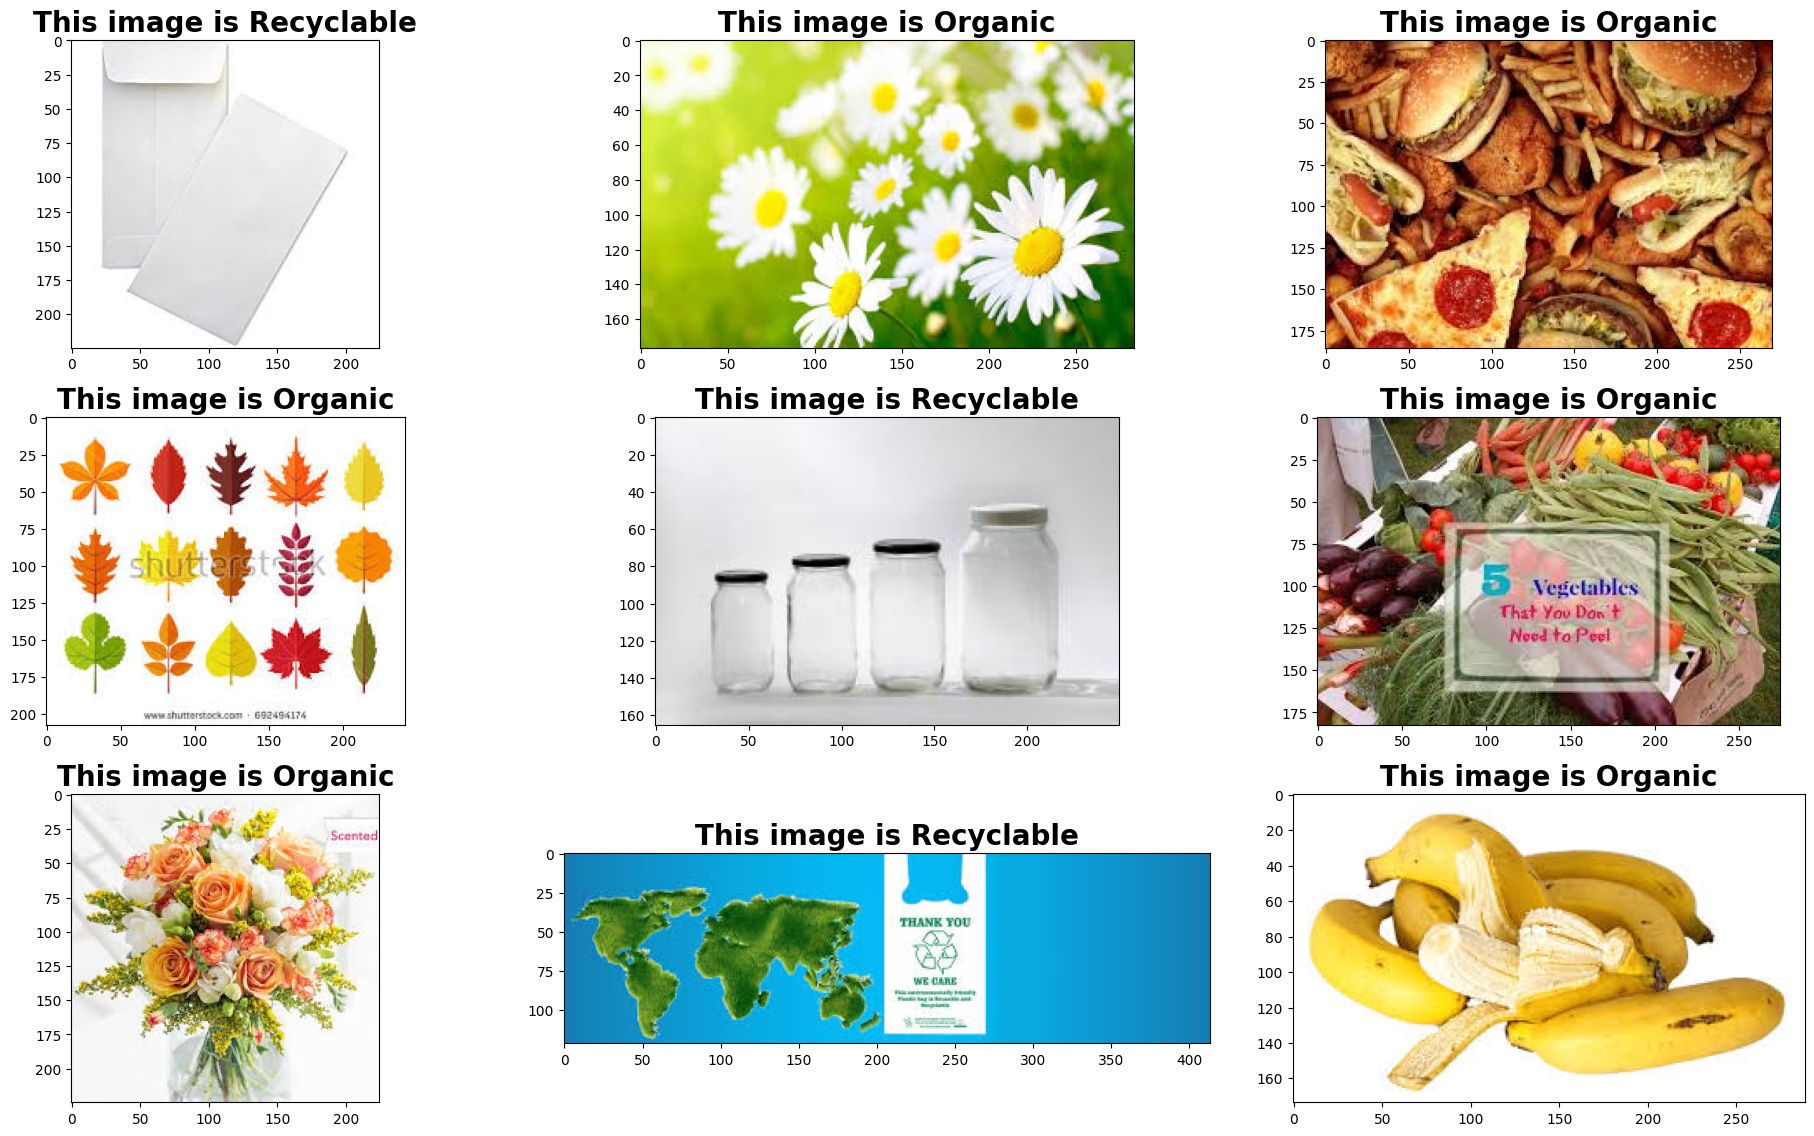

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(len(trainOrganic) + len(trainRecycle))
    if(df.target[index] == 0):
      plt.title('This image is Organic'.format(df.target[index]), fontdict={'size':20,'weight':'bold'})
    else:
      plt.title('This image is Recyclable'.format(df.target[index]), fontdict={'size':20,'weight':'bold'})

    img = cv2.imread(df.files[index])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.tight_layout()

# Data Preprocessing

In [ ]:
x_data = []
y_data = []

for files, target in df.values:
    img_array=cv2.imread(files)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    x_data.append(img_array)
    y_data.append(target)

data=pd.DataFrame({'image': x_data,'label': y_data})

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe=traindf,
        target_size= (256,256),
        batch_size = 256,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_dataframe(
        dataframe=traindf,
        target_size= (256,256),
        batch_size = 256,
        color_mode= "rgb",
        shuffle=False,
        class_mode="categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


# CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32,(2,2),input_shape = (256,256,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 255, 255, 32)      416       
                                                                 
 activation_10 (Activation)  (None, 255, 255, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 activation_11 (Activation)  (None, 126, 126, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                  

# Training

In [ ]:
classification_model = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)

<ipython-input-64-88c1ac83d146>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classification_model = model.fit_generator(


Epoch 1/10
89/89 [==============================] - 87s 941ms/step - loss: 0.5310 - accuracy: 0.7639 - val_loss: 0.3315 - val_accuracy: 0.8806
Epoch 2/10
89/89 [==============================] - 85s 952ms/step - loss: 0.3849 - accuracy: 0.8334 - val_loss: 0.3269 - val_accuracy: 0.8854
Epoch 3/10
89/89 [==============================] - 94s 1s/step - loss: 0.3445 - accuracy: 0.8529 - val_loss: 0.2979 - val_accuracy: 0.8870
Epoch 4/10
89/89 [==============================] - 84s 944ms/step - loss: 0.3112 - accuracy: 0.8693 - val_loss: 0.3044 - val_accuracy: 0.8798
Epoch 5/10
89/89 [==============================] - 84s 941ms/step - loss: 0.2823 - accuracy: 0.8842 - val_loss: 0.3010 - val_accuracy: 0.8922
Epoch 6/10
89/89 [==============================] - 83s 927ms/step - loss: 0.2556 - accuracy: 0.8961 - val_loss: 0.2865 - val_accuracy: 0.8874
Epoch 7/10
89/89 [==============================] - 84s 941ms/step - loss: 0.2101 - accuracy: 0.9180 - val_loss: 0.3319 - val_accuracy: 0.8727
Ep

In [ ]:
# Saving the model
model.save("PRmodel2.h5")

In [ ]:
file_path = '/content/PRmodel2.h5'
destination_folder_path = '/content/drive/MyDrive/UGM S1/SEM 4/'

shutil.copy(file_path, destination_folder_path)

'/content/drive/MyDrive/UGM S1/SEM 4/PRmodel2.h5'

# Predictions

In [ ]:
from keras.models import load_model

In [ ]:
# load model from downloaded files if needed
loaded_model = load_model('/content/PRmodel2.h5')

In [ ]:
# Loading the already trained model
loaded_model = load_model('/content/drive/MyDrive/UGM S1/SEM 4/PRmodel2.h5')

In [ ]:
def predictImg(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (256, 256))
    img = np.reshape(img, [-1, 256, 256,3])
    result = np.argmax(loaded_model.predict(img))
    print(result)
    if result == 0: print("This image is Recyclable")
    elif result == 1: print("This image is Organic")
    return result

1/1 [==============================] - 0s 48ms/step
1
This image is Organic


1

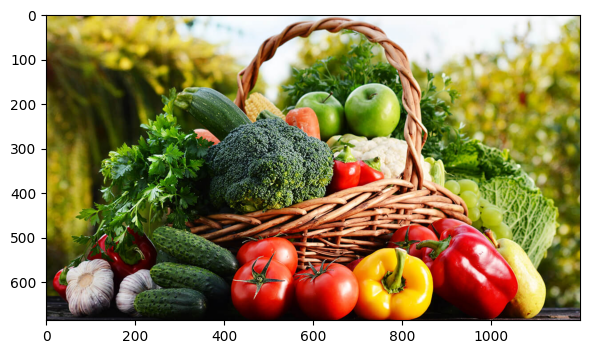

In [ ]:
predictImg(cv2.imread("/content/testOrganic.jpg"))

1/1 [==============================] - 0s 29ms/step
0
This image is Recyclable


0

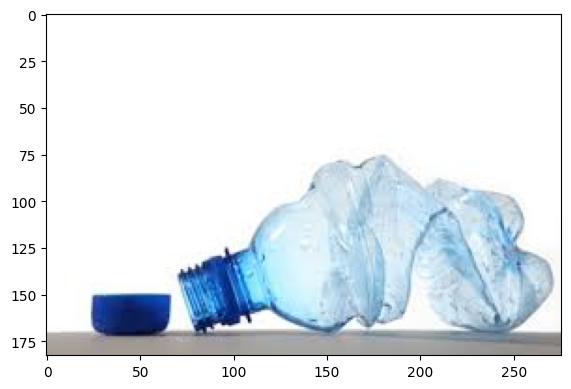

In [ ]:
predictImg(cv2.imread("/content/testRecyclable.jpg"))

#  Evaluation

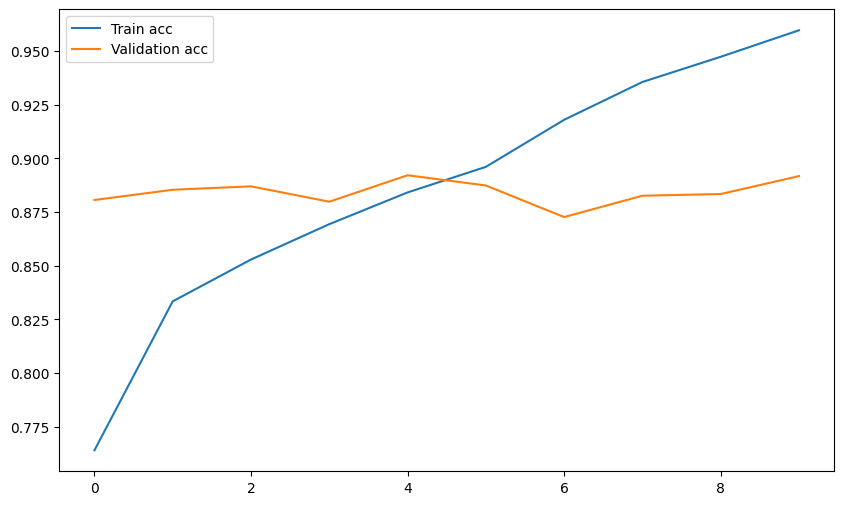

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(classification_model.history["accuracy"], label = "Train acc")
plt.plot(classification_model.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for the test data
predictions = loaded_model.predict_generator(test_generator)

# Extract true labels from the test data generator
true_labels = test_generator.classes

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(true_labels, predicted_labels))


<ipython-input-70-06400c97240d>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = loaded_model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1401
           1       0.93      0.79      0.86      1112

    accuracy                           0.88      2513
   macro avg       0.89      0.87      0.88      2513
weighted avg       0.89      0.88      0.88      2513

